In [ ]:
!pip install qiskit

In [ ]:
!pip install qiskit-aer

In [ ]:
!pip install qiskit-ibm-runtime

In [ ]:
!pip install pylatexenc

In [1]:
# Importar as bibliotecas necessárias
from qiskit import QuantumCircuit
from qiskit_aer.primitives import Sampler
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator

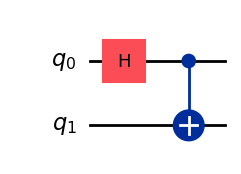

In [11]:

qc = QuantumCircuit(2)

qc.h(0)

qc.cx(0, 1)

qc.draw("mpl")


Resultados da medição: {1: 541, 0: 483}


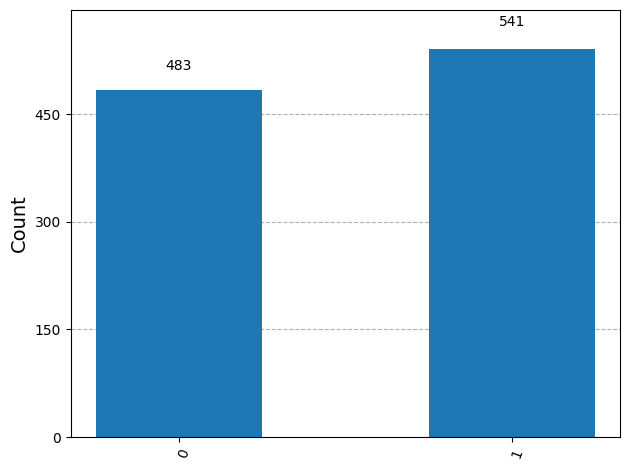

In [9]:
# 1. Criar um circuito com 1 qubit e 1 bit clássico para a medição
# QuantumCircuit(num_qubits, num_classical_bits)
# -> cria um circuito com 1 qubit (índice 0) e 1 bit clássico (índice 0).
# O bit clássico serve para armazenar o resultado da medição.
qc = QuantumCircuit(1, 1)


# 2. Aplicar a porta de Hadamard (H) para criar superposição
# Aplica a porta H no qubit 0.
# A porta H coloca |0> em uma superposição (≈ 50% |0>, 50% |1>).
qc.h(0)


# 3. Medir o qubit 0 e armazenar o resultado no bit clássico 0
# Mede o qubit 0 e grava o resultado no bit clássico 0.
# A medição "colapsa" a superposição em um dos resultados clássicos (0 ou 1).
qc.measure(0, 0)


# 4. Configurar o Sampler (simulador quântico)
# Instancia o primitivo Sampler (qiskit_aer.primitives.Sampler).
# O Sampler é a interface recomendada para simular amostras/medições.
sampler = Sampler()


# 5. Executar o circuito 1024 vezes
# .run recebe uma lista de circuitos ([qc]) — possibilita rodar vários de uma vez.
# shots=1024 indica quantas amostras/execuções queremos (a "estatística").
job = sampler.run([qc], shots=1024)

# Aguarda/obtém o resultado da execução e retorna um SamplerResult (objeto).
# Este objeto contém distribuições de probabilidade e outros metadados.
result = job.result()

# 6. Obter e imprimir os resultados
# Acessa a primeira distribuição de probabilidade retornada.
# quasi_dists geralmente é uma lista/array onde cada entrada é um dict
# mapeando strings de estados clássicos (ex: '0','1','00') para probabilidades.
probs = result.quasi_dists[0]


# Converte probabilidades em "contagens simuladas" multiplicando por shots.
# Usa int(...) — ou seja, faz truncamento (pode perder/ganhar 1 em soma total).
shots = 1024
counts = {state: int(p * shots) for state, p in probs.items()}

# Mostra no console o dicionário de contagens aproximadas
print("\nResultados da medição:", counts)

# 7. Visualizar o resultado em um histograma
# Usa o utilitário de visualização do Qiskit para plotar um histograma
# a partir do dicionário de contagens (ou probabilidades).
plot_histogram(counts)


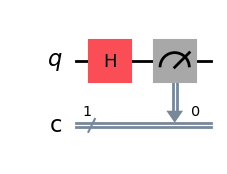

In [10]:
qc.draw(output="mpl")